# Capstone Project

Brendan McShane



Question 1: Are the continuous variables within the total data normally distributed? If not, are they normally distributed within disease state? Which continuous variables are the most correlated?

Making a scatter matrix of the continuous variables should answer these questions.

,mean_deviation,pattern_standard_deviation,cornea_thickness,RNFL4.mean
mean_deviation,1.000000,-0.529718,0.202814,0.679246
pattern_standard_deviation,-0.529718,1.000000,-0.138694,-0.604179
cornea_thickness,0.202814,-0.138694,1.000000,0.174527
RNFL4.mean,0.679246,-0.604179,0.174527,1.000000


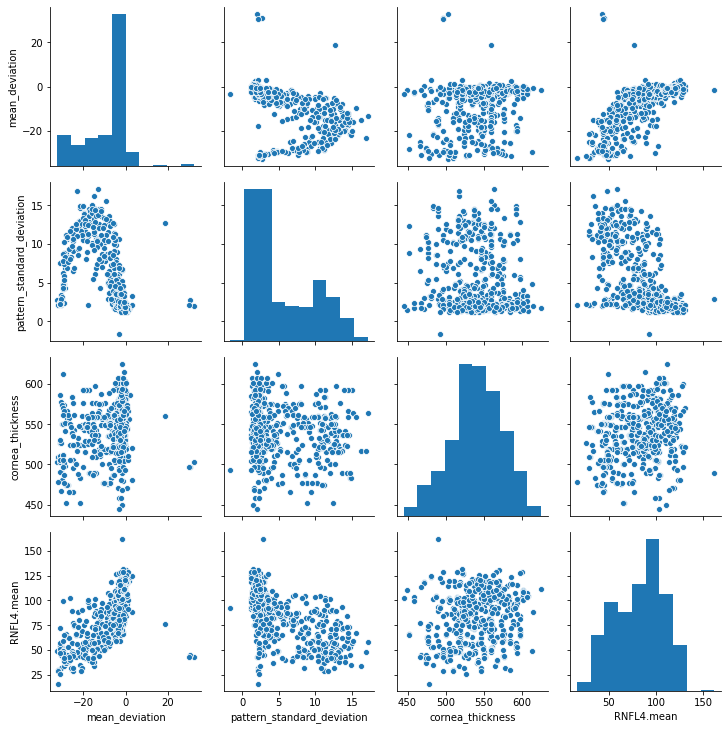

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt # for plotting
import pandas as pd # pandas
import seaborn as sns

whole_dataset = 'data/ds_whole.csv'

df = pd.read_csv(whole_dataset)
#read in the whole dataset

df_cont = df[['mean_deviation', 'pattern_standard_deviation', 'cornea_thickness', 'RNFL4.mean']]
#subset into the continuous variables only

sns.pairplot(df_cont)
#plot the scatter matrix of the continuous variables. I used seaborn because I like its default look better

corr = df_cont.corr()
#make a variable of the correlations between the variables (learned from https://stackoverflow.com/questions/27768677/pandas-scatter-matrix-display-correlation-coefficient)
corr
#print the correlation data frame

Based on the scatter matrix above, corna matrix, and to some extent RNFL4.mean seems to be roughly normally distibuted by eye.
Both deviation variables do not seem to be normally distirbuted, and are instead highly skewed. I'll split up these data into disease vs. healthy and repeat the scatter matrix plotting to see if those look better.

Additionally, the correlations between these continuous variables show that RNFL4.mean and mean_deviation are the most well correlated, with a Pearson correlation coefficient of ~0.679.

Disease scatter matrix
Healthy scatter matrix


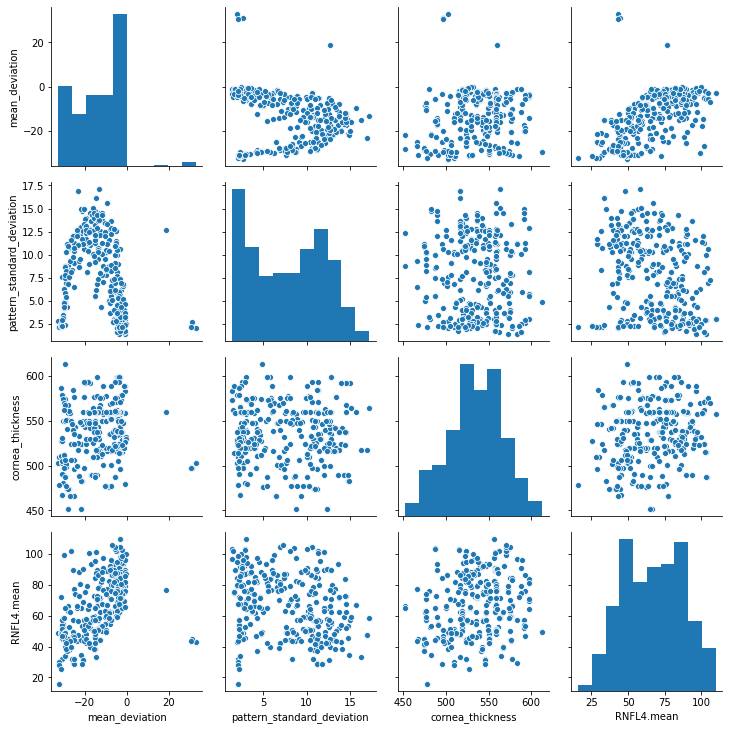

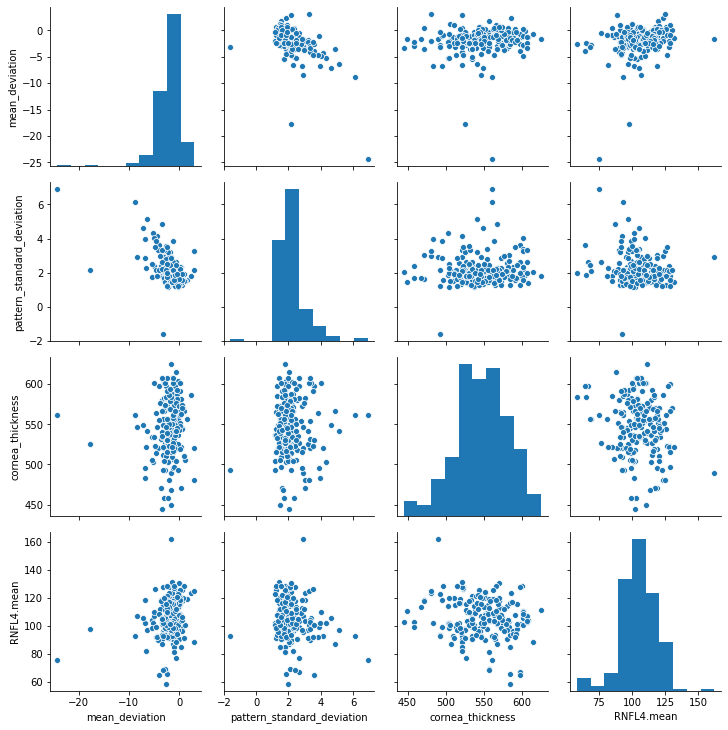

In [4]:
#A value of 1 in the glaucoma series indicates presence of the disease while 0 indicates absence.
df_disease =  df[ df['glaucoma'] == 1 ]
df_healthy = df[ df['glaucoma'] == 0 ]
#Subset data into healthy vs. disease
df_healthy_cont = df_healthy[['mean_deviation', 'pattern_standard_deviation', 'cornea_thickness', 'RNFL4.mean']]
df_disease_cont = df_disease[['mean_deviation', 'pattern_standard_deviation', 'cornea_thickness', 'RNFL4.mean']]
#Subset just the continuous variables again

print('Disease scatter matrix')
sns.pairplot(df_disease_cont)
print('Healthy scatter matrix')
sns.pairplot(df_healthy_cont)